### Loan Eligibility Prediction

In [1]:
### importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### fetching csv data into train_data
train_data = pd.read_csv("train.csv")

In [3]:
### showing top 5 value of trai_data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
### counting rows and columns of train_data
print(train_data.shape)

(614, 13)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
### Dealing with null values [ categorical ]

cols = train_data[["Gender", "Married", "Dependents" , "Self_Employed"]] 
for  i in cols: 
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)

In [9]:
### Dealing with Numerical Values missig_data

n_cols = train_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)

In [10]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### Let us compare columns with Loan status if they plays important role

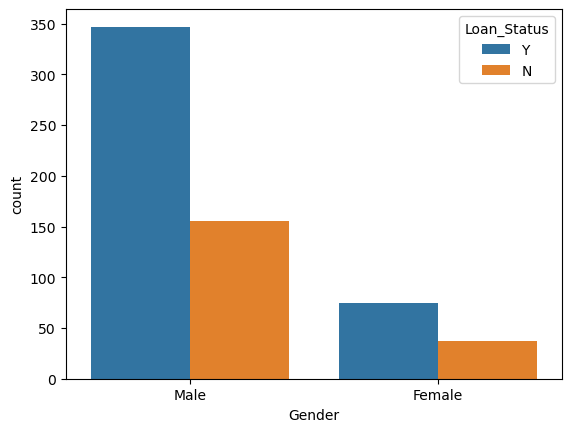

In [12]:
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.show()

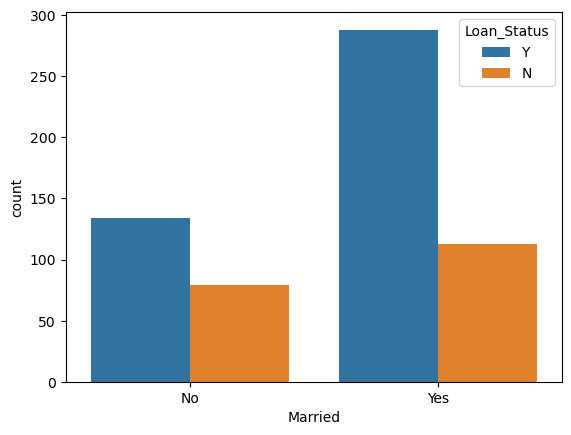

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.show()

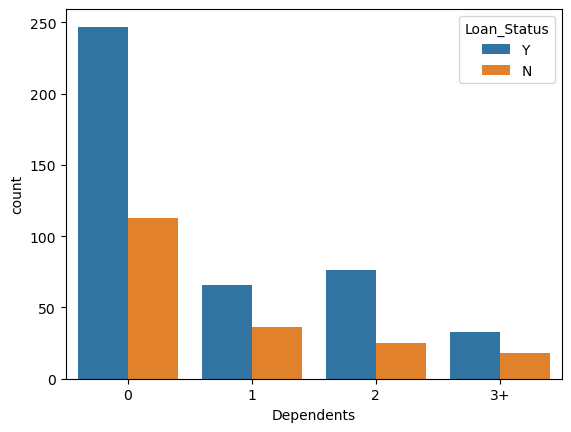

In [14]:
sns.countplot(x='Dependents', hue='Loan_Status', data=train_data)
plt.show()

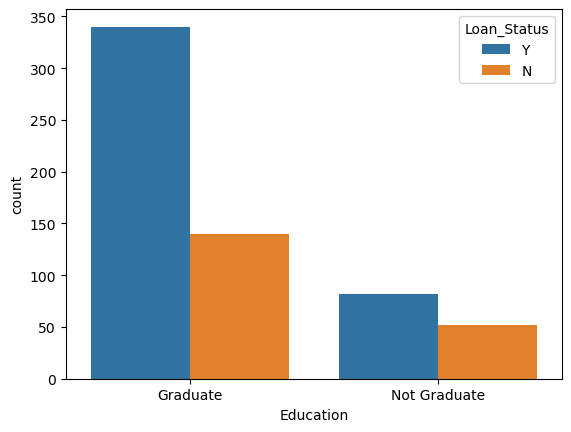

In [15]:
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.show()

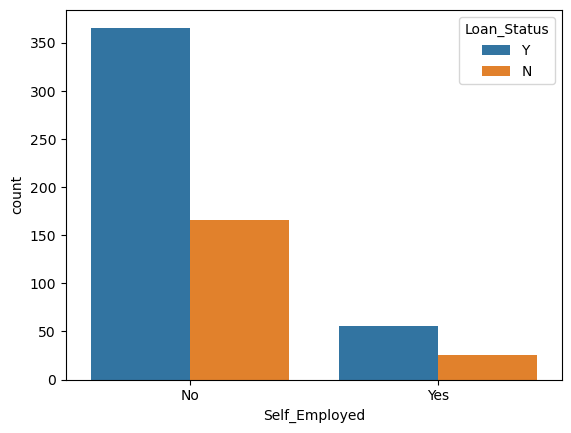

In [16]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_data)
plt.show()

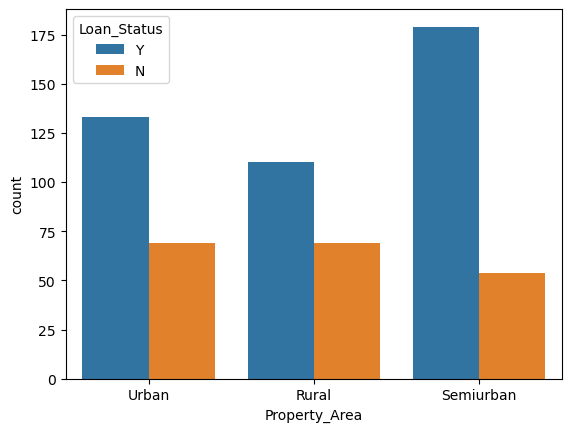

In [17]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data)
plt.show()

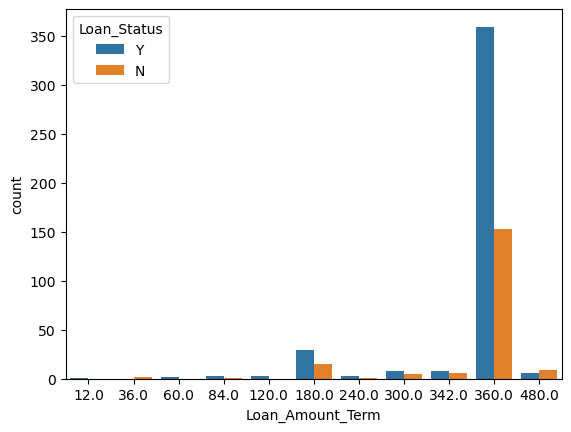

In [18]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=train_data)
plt.show()

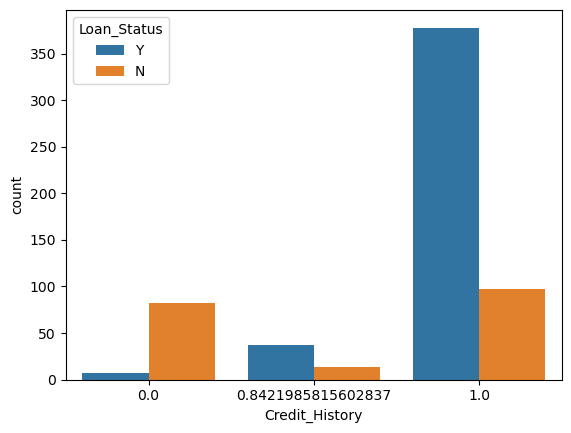

In [19]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.show()

In [20]:
### We remove columns that will not be useful for prediction
columns_to_drop = ['Loan_ID', 'Gender', 'Self_Employed']
train_data.drop(columns=columns_to_drop, inplace=True)

In [21]:
train_data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Yes,1,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Yes,0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,No,0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### We have removed unneccesary columns and now we will continue to our prediction

#### we see few outlies in this boxplot which we need to remove for better alanysis

#### not much difference in low income but high income depends on education

<Axes: >

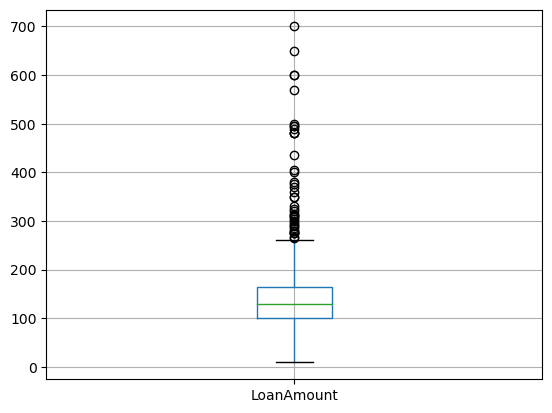

In [22]:
train_data.boxplot(column = 'LoanAmount')

<Axes: >

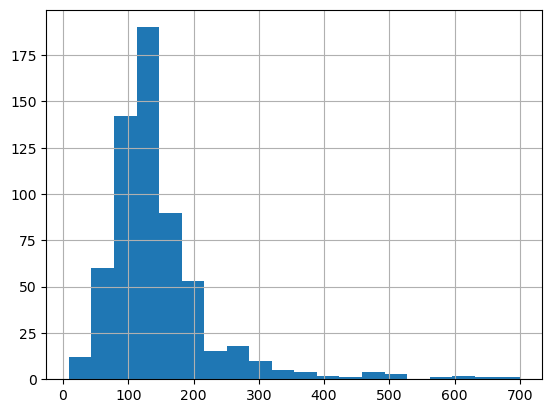

In [23]:
train_data['LoanAmount'].hist(bins = 20)

In [24]:
### we use log value for normalization

<Axes: >

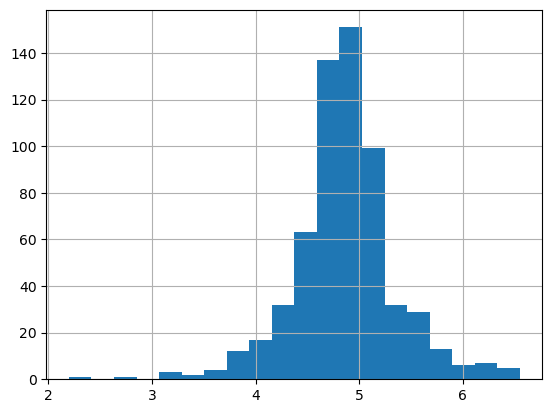

In [25]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins = 20)

In [26]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']

<Axes: >

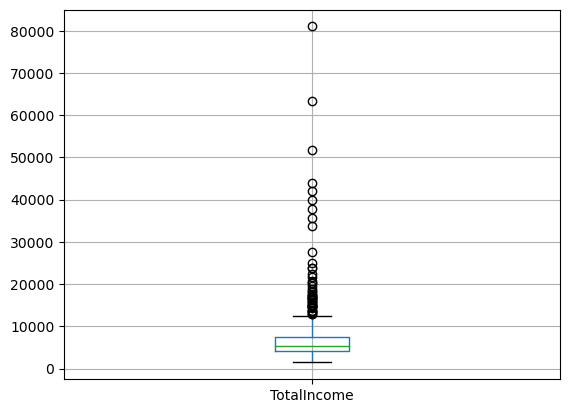

In [27]:
train_data.boxplot(column = 'TotalIncome')

<Axes: >

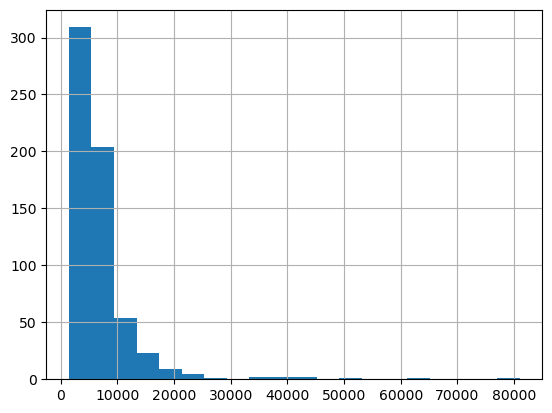

In [28]:
train_data['TotalIncome'].hist(bins = 20)

<Axes: >

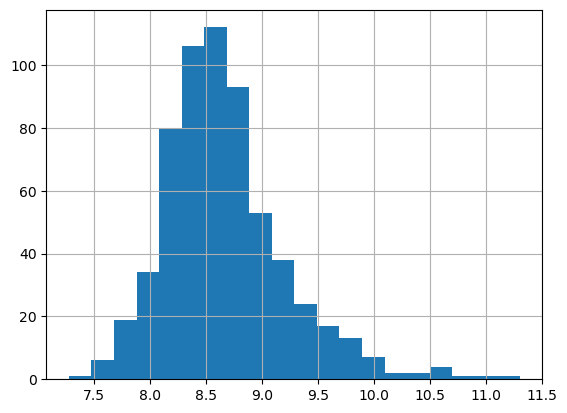

In [29]:
train_data['TotalIncome_log'] = np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins = 20)

#### As we have taken log values for Loan_Amount and TotalIncome, now we can drop ApplicantIncome,CoapplicatIncome and TotalIncome columns

In [30]:
train_data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,No,0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,Yes,1,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Yes,0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Yes,0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,No,0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [31]:
#columns_drop = ['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome']
train_data.drop(columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'], inplace = True)

In [32]:
train_data.head()

,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,No,0,Graduate,360.0,1.0,Urban,Y,4.986426,8.674026
1,Yes,1,Graduate,360.0,1.0,Rural,N,4.852030,8.714568
2,Yes,0,Graduate,360.0,1.0,Urban,Y,4.189655,8.006368
3,Yes,0,Not Graduate,360.0,1.0,Urban,Y,4.787492,8.505323
4,No,0,Graduate,360.0,1.0,Urban,Y,4.948760,8.699515


In [33]:
mapping = {'Yes': 1, 'No': 0, 'Graduate': 1, 'Not Graduate' : 0, 'Urban':1,'Rural':0,'Semiurban':0.5, 'Y':1,'N':0,'3+':3,'1':1,'0':0,'2':2}

# Use the map function to replace values
train_data['Married'] = train_data['Married'].map(mapping)
train_data['Education'] = train_data['Education'].map(mapping)
train_data['Property_Area'] = train_data['Property_Area'].map(mapping)
train_data['Loan_Status'] = train_data['Loan_Status'].map(mapping)
train_data['Dependents'] = train_data['Dependents'].map(mapping)


In [34]:
train_data.head()

,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,0.0,0.0,1.0,360.0,1.0,1.0,1.0,4.986426,8.674026
1,1.0,1.0,1.0,360.0,1.0,0.0,0.0,4.852030,8.714568
2,1.0,0.0,1.0,360.0,1.0,1.0,1.0,4.189655,8.006368
3,1.0,0.0,0.0,360.0,1.0,1.0,1.0,4.787492,8.505323
4,0.0,0.0,1.0,360.0,1.0,1.0,1.0,4.948760,8.699515


#### Dividing dependent and independent columns

In [35]:
X = train_data.iloc[:,np.r_[0:6,7,8]].values
y = train_data.iloc[:,6].values

In [36]:
X

array([[0.        , 0.        , 1.        , ..., 1.        , 4.98642567,
        8.67402599],
       [1.        , 1.        , 1.        , ..., 0.        , 4.85203026,
        8.71456755],
       [1.        , 0.        , 1.        , ..., 1.        , 4.18965474,
        8.00636757],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 5.53338949,
        9.02545553],
       [1.        , 2.        , 1.        , ..., 1.        , 5.23110862,
        8.93366418],
       [0.        , 0.        , 1.        , ..., 0.5       , 4.89034913,
        8.43010908]])

In [37]:
y

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

#### splitting dataset into train and test dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [39]:
X_train

array([[1.        , 0.        , 1.        , ..., 0.5       , 4.87519732,
        8.67556353],
       [0.        , 1.        , 1.        , ..., 0.5       , 5.27811466,
        9.32812341],
       [1.        , 0.        , 1.        , ..., 0.        , 5.00394631,
        8.64488255],
       ...,
       [1.        , 3.        , 1.        , ..., 0.5       , 5.29831737,
        9.02809881],
       [1.        , 0.        , 0.        , ..., 1.        , 5.07517382,
        8.70499968],
       [1.        , 0.        , 1.        , ..., 0.5       , 5.20400669,
        8.77740129]])

In [40]:
y_train

array([1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [41]:
X_test

array([[  0.        ,   0.        ,   1.        , 360.        ,
          1.        ,   0.5       ,   4.4308168 ,   8.86573515],
       [  0.        ,   0.        ,   1.        , 360.        ,
          1.        ,   0.5       ,   4.71849887,   8.34995727],
       [  1.        ,   0.        ,   1.        , 360.        ,
          1.        ,   1.        ,   5.78074352,   9.21423279],
       [  1.        ,   0.        ,   1.        , 360.        ,
          1.        ,   1.        ,   4.70048037,   8.82232218],
       [  1.        ,   2.        ,   1.        , 360.        ,
          1.        ,   0.5       ,   4.57471098,   8.26230094],
       [  1.        ,   0.        ,   0.        , 180.        ,
          0.        ,   0.        ,   5.10594547,   8.70913499],
       [  1.        ,   3.        ,   1.        , 180.        ,
          1.        ,   0.        ,   5.05624581,   8.766706  ],
       [  0.        ,   0.        ,   1.        , 360.        ,
          1.        ,   0.5      

In [42]:
y_test

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1.])

In [43]:
### Scaling dataset before applying machine learning algorithm
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#### Applying Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1.])

In [46]:
from sklearn import metrics
print('The accurancy of decision tree is: ', metrics.accuracy_score(y_pred,y_test))

The accurancy of decision tree is:  0.7235772357723578


#### The accuracy that we got is not standard

#### Now we apply naive bayes algorithm

In [47]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [48]:
y_pred = NBClassifier.predict(X_test)

In [49]:
y_pred

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1.])

In [50]:
print('The accurancy of naive bayes is: ', metrics.accuracy_score(y_pred,y_test))

The accurancy of naive bayes is:  0.8292682926829268


#### This accuracy is much better

In [51]:
test_data = pd.read_csv("test_data.csv")

In [52]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [53]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
### Dealing with null values [ categorical ]
cols = test_data[["Gender", "Dependents" , "Self_Employed"]] 
for  i in cols: 
    test_data[i].fillna(test_data[i].mode().iloc[0], inplace=True)

In [55]:
### Dealing with Numerical Values missig_data  

n_cols = test_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    test_data[i].fillna(test_data[i].mean(axis=0), inplace=True)

In [56]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
test_data.drop(columns = ['Loan_ID','Gender','Self_Employed'],inplace = True)

In [58]:
test_data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Yes,0,Graduate,5720,0,110.0,360.0,1.000000,Urban
1,Yes,1,Graduate,3076,1500,126.0,360.0,1.000000,Urban
2,Yes,2,Graduate,5000,1800,208.0,360.0,1.000000,Urban
3,Yes,2,Graduate,2340,2546,100.0,360.0,0.825444,Urban
4,No,0,Not Graduate,3276,0,78.0,360.0,1.000000,Urban


<Axes: >

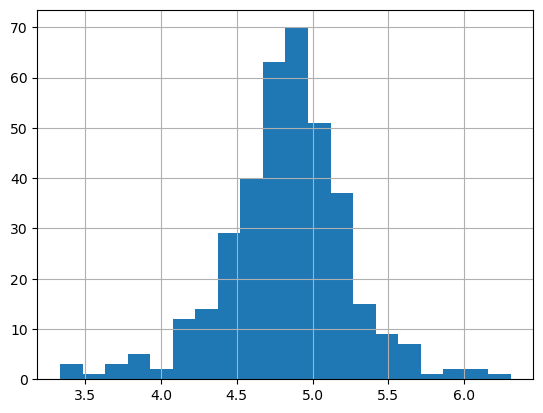

In [59]:
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])
test_data['LoanAmount_log'].hist(bins = 20)

<Axes: >

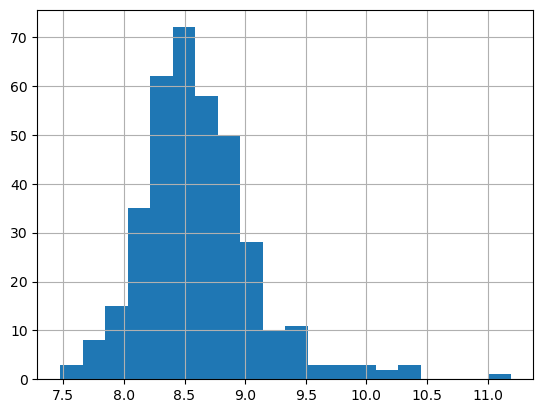

In [60]:
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['TotalIncome_log'] = np.log(test_data['TotalIncome'])
test_data['TotalIncome_log'].hist(bins = 20)

In [61]:
test_data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,Yes,0,Graduate,5720,0,110.0,360.0,1.000000,Urban,4.700480,5720,8.651724
1,Yes,1,Graduate,3076,1500,126.0,360.0,1.000000,Urban,4.836282,4576,8.428581
2,Yes,2,Graduate,5000,1800,208.0,360.0,1.000000,Urban,5.337538,6800,8.824678
3,Yes,2,Graduate,2340,2546,100.0,360.0,0.825444,Urban,4.605170,4886,8.494129
4,No,0,Not Graduate,3276,0,78.0,360.0,1.000000,Urban,4.356709,3276,8.094378


In [62]:
test_data.drop(columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],inplace = True)
test_data.head()

,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,Yes,0,Graduate,360.0,1.000000,Urban,4.700480,8.651724
1,Yes,1,Graduate,360.0,1.000000,Urban,4.836282,8.428581
2,Yes,2,Graduate,360.0,1.000000,Urban,5.337538,8.824678
3,Yes,2,Graduate,360.0,0.825444,Urban,4.605170,8.494129
4,No,0,Not Graduate,360.0,1.000000,Urban,4.356709,8.094378


#### Dividing dependent and independent columns

In [63]:
test = test_data.values

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,8):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [65]:
test

array([[1, 0, 0, ..., 2, 52, 207],
       [1, 1, 0, ..., 2, 67, 124],
       [1, 2, 0, ..., 2, 120, 251],
       ...,
       [0, 0, 0, ..., 1, 67, 174],
       [1, 0, 0, ..., 0, 95, 268],
       [0, 0, 0, ..., 0, 40, 311]], dtype=object)

In [66]:
test = ss.fit_transform(test)

In [67]:
prediction = NBClassifier.predict(test)

In [68]:
prediction

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1.

In [69]:
test_data['LoanEligibility'] = prediction

In [70]:
test_data

,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,LoanEligibility
0,Yes,0,Graduate,360.0,1.000000,Urban,4.700480,8.651724,1.0
1,Yes,1,Graduate,360.0,1.000000,Urban,4.836282,8.428581,1.0
2,Yes,2,Graduate,360.0,1.000000,Urban,5.337538,8.824678,1.0
3,Yes,2,Graduate,360.0,0.825444,Urban,4.605170,8.494129,0.0
4,No,0,Not Graduate,360.0,1.000000,Urban,4.356709,8.094378,1.0
...,...,...,...,...,...,...,...,...,...
362,Yes,3+,Not Graduate,360.0,1.000000,Urban,4.727388,8.663196,1.0
363,Yes,0,Graduate,360.0,1.000000,Urban,4.744932,8.490233,1.0
364,No,0,Graduate,360.0,0.825444,Semiurban,4.836282,8.564649,0.0
365,Yes,0,Graduate,360.0,1.000000,Rural,5.062595,8.908289,1.0


In [71]:
mapping = {1: 'yes', 0: 'no'}
test_data['LoanEligibility'] = test_data['LoanEligibility'].map(mapping)

In [72]:
test_data

,Married,Dependents,Education,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,LoanEligibility
0,Yes,0,Graduate,360.0,1.000000,Urban,4.700480,8.651724,yes
1,Yes,1,Graduate,360.0,1.000000,Urban,4.836282,8.428581,yes
2,Yes,2,Graduate,360.0,1.000000,Urban,5.337538,8.824678,yes
3,Yes,2,Graduate,360.0,0.825444,Urban,4.605170,8.494129,no
4,No,0,Not Graduate,360.0,1.000000,Urban,4.356709,8.094378,yes
...,...,...,...,...,...,...,...,...,...
362,Yes,3+,Not Graduate,360.0,1.000000,Urban,4.727388,8.663196,yes
363,Yes,0,Graduate,360.0,1.000000,Urban,4.744932,8.490233,yes
364,No,0,Graduate,360.0,0.825444,Semiurban,4.836282,8.564649,no
365,Yes,0,Graduate,360.0,1.000000,Rural,5.062595,8.908289,yes


### Now we can see who is eligible for loan apporval.